In [1]:
!pip install yfinance

  Using cached yfinance-0.2.63-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1-py3-none-any.whl
  Using cached curl_cffi-0.11.4-cp39-abi3-win_amd64.whl.metadata (14 kB)
  Using cached websockets-15.0.1-cp312-cp312-win_amd64.whl.metadata (7.0 kB)
Using cached yfinance-0.2.63-py2.py3-none-any.whl (118 kB)
Using cached curl_cffi-0.11.4-cp39-abi3-win_amd64.whl (1.6 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Using cached websockets-15.0.1-cp312-cp312-win_amd64.whl (176 kB)


In [33]:
import yfinance as yf
import numpy as np
# List of tickers (sample small portfolio)
tickers = ["AAPL"]

# Download daily historical prices for the past 1 year
data = yf.download(tickers, start="2014-12-01", end="2024-12-01")



C:\Users\rubie\AppData\Local\Temp\ipykernel_16228\1839241380.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2014-12-01", end="2024-12-01")
[*********************100%***********************]  1 of 1 completed


In [34]:
 df_2 = data.iloc[:,[0,1,2,3,4]]

In [35]:
df_2.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [36]:
# Drop (remove) the column level names
df_2.columns.names = [None, None]

In [41]:
df_2.columns = ['_'.join(map(str, col)) for col in df_2.columns]

In [43]:
df_2

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL
Date,,,,,
2014-12-01,25.563766,26.492389,24.719564,26.394638,335256000
2014-12-02,25.466021,25.714839,25.048363,25.214982,237395600
2014-12-03,25.754829,25.848136,25.572660,25.714841,172253600
2014-12-04,25.657072,26.036963,25.612641,25.719276,168178000
2014-12-05,25.548216,25.788147,25.468239,25.768152,153275600
...,...,...,...,...,...
2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300
2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800
2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200


In [45]:
df_3 = df_2
len(df_3)

2517

In [47]:
df_2.iloc[:,0]

Date
2014-12-01     25.563766
2014-12-02     25.466021
2014-12-03     25.754829
2014-12-04     25.657072
2014-12-05     25.548216
                 ...    
2024-11-22    229.316818
2024-11-25    232.309601
2024-11-26    234.494324
2024-11-27    234.364639
2024-11-29    236.758865
Name: Close_AAPL, Length: 2517, dtype: float64

In [49]:
def compute_log_mean_return(df, col, stock_id):
    annual_mu = []
    annual_sigma = []
    
    for i in range(len(df_3)):
        try:
            lower = i - 252
            upper = i - 1 
            prices = df.iloc[lower:upper+1, col].values
            
            # Calculate daily log returns
            log_returns = np.diff(np.log(prices))
            
            # Calculate daily statistics
            daily_mean = np.mean(log_returns)
            daily_std = np.std(log_returns, ddof=1)
            
            # Convert to annualized GBM parameters
            mu_hat = daily_mean * 252 + (daily_std * np.sqrt(252))**2 / 2
            sigma_hat = daily_std * np.sqrt(252)
        except:
            mu_hat = 0
            sigma_hat = 0
        
        annual_mu.append(mu_hat)
        annual_sigma.append(sigma_hat)
    
    df_3[f"annual_mu_{stock_id}"] = annual_mu
    df_3[f"annual_sigma_{stock_id}"] = annual_sigma

#calculate mean and std of log return with a rolling window of 252 samples

In [51]:
def prior_var_mean_return(df, col, stock_id):
    mean = []
    variance = []
    
    for i in range(len(df_3)):
        try:
            lower = i - 20
            upper = i - 1 
            prices = df.iloc[lower:upper+1, col].values
            
            # Calculate daily log returns
            log_returns = np.diff(np.log(prices))
            
            # Calculate daily statistics
            daily_mean = np.mean(log_returns)
            daily_var = np.var(log_returns, ddof=1)
            
        except:
            daily_mean = 0
            daiy_var = 0
        
        mean.append(daily_mean)
        variance.append(daily_var)
    
    df_3[f"Local_return_mean_{stock_id}"] = mean
    df_3[f"Local_return_variance_{stock_id}"] = variance

#calculate mean and var of log daily return of previous 20 trading days
#this will show recent market behavior

In [53]:
compute_log_mean_return(df_2, 0,"AAPL")

C:\Users\rubie\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rubie\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\rubie\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\rubie\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\rubie\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [54]:
prior_var_mean_return(df_2,0,"AAPL") #mean return and var of prev 20 trading days

C:\Users\rubie\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\rubie\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\rubie\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\rubie\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\rubie\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [57]:
df_3

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL
Date,,,,,,,,,
2014-12-01,25.563766,26.492389,24.719564,26.394638,335256000,NaN,NaN,NaN,NaN
2014-12-02,25.466021,25.714839,25.048363,25.214982,237395600,NaN,NaN,NaN,NaN
2014-12-03,25.754829,25.848136,25.572660,25.714841,172253600,NaN,NaN,NaN,NaN
2014-12-04,25.657072,26.036963,25.612641,25.719276,168178000,NaN,NaN,NaN,NaN
2014-12-05,25.548216,25.788147,25.468239,25.768152,153275600,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116
2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113
2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123


In [59]:
len(df_3[df_3.isna().any(axis=1)])

252

In [61]:
df_3.dropna(inplace=True)

In [63]:
df_3

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL
Date,,,,,,,,,
2015-12-01,26.512224,26.844362,26.403772,26.830806,139409600,0.080145,0.266042,-0.001041,0.000216
2015-12-02,26.272720,26.686198,26.227532,26.512220,133546400,0.075837,0.266143,-0.002070,0.000209
2015-12-03,26.028709,26.387961,25.807286,26.333735,166278000,0.055384,0.266068,-0.002303,0.000211
2015-12-04,26.894072,26.943779,26.008373,26.049043,231108000,0.049871,0.266206,-0.002550,0.000214
2015-12-07,26.724617,27.081608,26.618423,26.882779,128336800,0.087501,0.268172,-0.000890,0.000279
...,...,...,...,...,...,...,...,...,...
2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116
2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113
2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123


In [65]:
import numpy as np

day_index = np.arange(df_3.shape[0])
day_index

array([   0,    1,    2, ..., 2262, 2263, 2264])

In [67]:
df_3["date_index"]=day_index

df_3

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL,date_index
Date,,,,,,,,,,
2015-12-01,26.512224,26.844362,26.403772,26.830806,139409600,0.080145,0.266042,-0.001041,0.000216,0
2015-12-02,26.272720,26.686198,26.227532,26.512220,133546400,0.075837,0.266143,-0.002070,0.000209,1
2015-12-03,26.028709,26.387961,25.807286,26.333735,166278000,0.055384,0.266068,-0.002303,0.000211,2
2015-12-04,26.894072,26.943779,26.008373,26.049043,231108000,0.049871,0.266206,-0.002550,0.000214,3
2015-12-07,26.724617,27.081608,26.618423,26.882779,128336800,0.087501,0.268172,-0.000890,0.000279,4
...,...,...,...,...,...,...,...,...,...,...
2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116,2260
2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113,2261
2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123,2262


In [69]:
df_3.to_csv("fin_data.csv", index=False)

In [71]:
"""

This notebook compiles ticker data for Apple Inc. - AAPL


Columns for each ticker
- Closing price
- Date 1/12/15 to 11/29/24 
- mean log daily return (average log daily return of 252 prior trading days)
- std of log return (average log daily return of 252 prior trading days)


"""

'\n\nThis notebook compiles ticker data for Apple Inc. - AAPL\n\n\nColumns for each ticker\n- Closing price\n- Date 1/12/15 to 11/29/24 \n- mean log daily return (average log daily return of 252 prior trading days)\n- std of log return (average log daily return of 252 prior trading days)\n\n\n'

In [73]:
import pandas as pd

In [75]:
file = "cpi_data.csv"
data = pd.read_csv(file)

data

,observation_date,USACPALTT01CTGYM
0,2014-12-01,0.755009
1,2015-01-01,-0.158827
2,2015-02-01,-0.079117
3,2015-03-01,-0.100926
4,2015-04-01,-0.226851
...,...,...
116,2024-08-01,1.986942
117,2024-09-01,2.200124
118,2024-10-01,2.474688
119,2024-11-01,2.754135


In [77]:
data = data.rename(columns = {"USACPALTT01CTGYM" : "USA_CPI"})
data = data.rename(columns = {"observation_date" : "Date"})
data["Date"] = pd.to_datetime(data["Date"])

data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data

,Date,USA_CPI,month,year
0,2014-12-01,0.755009,12,2014
1,2015-01-01,-0.158827,1,2015
2,2015-02-01,-0.079117,2,2015
3,2015-03-01,-0.100926,3,2015
4,2015-04-01,-0.226851,4,2015
...,...,...,...,...
116,2024-08-01,1.986942,8,2024
117,2024-09-01,2.200124,9,2024
118,2024-10-01,2.474688,10,2024
119,2024-11-01,2.754135,11,2024


In [79]:
df_3  = df_3.reset_index()

df_3['month'] = df_3['Date'].dt.month
df_3['year'] = df_3['Date'].dt.year
df_3



,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL,date_index,month,year
0,2015-12-01,26.512224,26.844362,26.403772,26.830806,139409600,0.080145,0.266042,-0.001041,0.000216,0,12,2015
1,2015-12-02,26.272720,26.686198,26.227532,26.512220,133546400,0.075837,0.266143,-0.002070,0.000209,1,12,2015
2,2015-12-03,26.028709,26.387961,25.807286,26.333735,166278000,0.055384,0.266068,-0.002303,0.000211,2,12,2015
3,2015-12-04,26.894072,26.943779,26.008373,26.049043,231108000,0.049871,0.266206,-0.002550,0.000214,3,12,2015
4,2015-12-07,26.724617,27.081608,26.618423,26.882779,128336800,0.087501,0.268172,-0.000890,0.000279,4,12,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116,2260,11,2024
2261,2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113,2261,11,2024
2262,2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123,2262,11,2024
2263,2024-11-27,234.364639,235.122820,233.247339,233.905755,33498400,0.241767,0.224976,0.001180,0.000113,2263,11,2024


In [81]:
df_4 = pd.merge(df_3, data, on = ["month", "year"])
df_4

,Date_x,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL,date_index,month,year,Date_y,USA_CPI
0,2015-12-01,26.512224,26.844362,26.403772,26.830806,139409600,0.080145,0.266042,-0.001041,0.000216,0,12,2015,2015-12-01,0.632977
1,2015-12-02,26.272720,26.686198,26.227532,26.512220,133546400,0.075837,0.266143,-0.002070,0.000209,1,12,2015,2015-12-01,0.632977
2,2015-12-03,26.028709,26.387961,25.807286,26.333735,166278000,0.055384,0.266068,-0.002303,0.000211,2,12,2015,2015-12-01,0.632977
3,2015-12-04,26.894072,26.943779,26.008373,26.049043,231108000,0.049871,0.266206,-0.002550,0.000214,3,12,2015,2015-12-01,0.632977
4,2015-12-07,26.724617,27.081608,26.618423,26.882779,128336800,0.087501,0.268172,-0.000890,0.000279,4,12,2015,2015-12-01,0.632977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116,2260,11,2024,2024-11-01,2.754135
2261,2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113,2261,11,2024,2024-11-01,2.754135
2262,2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123,2262,11,2024,2024-11-01,2.754135
2263,2024-11-27,234.364639,235.122820,233.247339,233.905755,33498400,0.241767,0.224976,0.001180,0.000113,2263,11,2024,2024-11-01,2.754135


In [83]:
df_4.columns

Index(['Date_x', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL',
       'Volume_AAPL', 'annual_mu_AAPL', 'annual_sigma_AAPL',
       'Local_return_mean_AAPL', 'Local_return_variance_AAPL', 'date_index',
       'month', 'year', 'Date_y', 'USA_CPI'],
      dtype='object')

In [85]:
df_4 = df_4.drop(["Date_y"], axis = 1)
df_4

,Date_x,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL,date_index,month,year,USA_CPI
0,2015-12-01,26.512224,26.844362,26.403772,26.830806,139409600,0.080145,0.266042,-0.001041,0.000216,0,12,2015,0.632977
1,2015-12-02,26.272720,26.686198,26.227532,26.512220,133546400,0.075837,0.266143,-0.002070,0.000209,1,12,2015,0.632977
2,2015-12-03,26.028709,26.387961,25.807286,26.333735,166278000,0.055384,0.266068,-0.002303,0.000211,2,12,2015,0.632977
3,2015-12-04,26.894072,26.943779,26.008373,26.049043,231108000,0.049871,0.266206,-0.002550,0.000214,3,12,2015,0.632977
4,2015-12-07,26.724617,27.081608,26.618423,26.882779,128336800,0.087501,0.268172,-0.000890,0.000279,4,12,2015,0.632977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116,2260,11,2024,2.754135
2261,2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113,2261,11,2024,2.754135
2262,2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123,2262,11,2024,2.754135
2263,2024-11-27,234.364639,235.122820,233.247339,233.905755,33498400,0.241767,0.224976,0.001180,0.000113,2263,11,2024,2.754135


In [87]:
df_4.to_csv("fin_data.csv", index=False)

In [89]:
#Need to add gold daily close price & monthly unemployement rates to fin_data.csv

In [91]:
import pandas as pd
import yfinance as yf
import numpy as np
# List of tickers (sample small portfolio)
tickers = ["GC=F"]

# Download daily historical prices for the past 1 year
gold_futures = yf.download(tickers, start="2015-01-12", end="2024-11-29")

C:\Users\rubie\AppData\Local\Temp\ipykernel_16228\2344491165.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_futures = yf.download(tickers, start="2015-01-12", end="2024-11-29")
[*********************100%***********************]  1 of 1 completed


In [93]:
gold_futures

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2015-01-12,1232.699951,1234.400024,1219.099976,1224.199951,100
2015-01-13,1234.300049,1239.300049,1230.300049,1239.199951,20
2015-01-14,1234.400024,1243.800049,1225.599976,1229.599976,21
2015-01-15,1264.699951,1265.000000,1227.300049,1231.500000,130
2015-01-16,1276.900024,1279.699951,1256.099976,1256.099976,44
...,...,...,...,...,...
2024-11-21,2672.100098,2672.100098,2655.699951,2659.300049,33
2024-11-22,2709.899902,2710.500000,2685.600098,2687.500000,41


In [95]:
gold_futures.columns

MultiIndex([( 'Close', 'GC=F'),
            (  'High', 'GC=F'),
            (   'Low', 'GC=F'),
            (  'Open', 'GC=F'),
            ('Volume', 'GC=F')],
           names=['Price', 'Ticker'])

In [97]:
gold_futures = gold_futures.reset_index()

In [99]:
gold_futures["Date"] = pd.to_datetime(gold_futures["Date"])

In [101]:
# Drop (remove) the column level names
gold_futures.columns.names = [None, None]
gold_futures.columns = ['_'.join(map(str, col)) for col in gold_futures.columns]

gold_futures

,Date_,Close_GC=F,High_GC=F,Low_GC=F,Open_GC=F,Volume_GC=F
0,2015-01-12,1232.699951,1234.400024,1219.099976,1224.199951,100
1,2015-01-13,1234.300049,1239.300049,1230.300049,1239.199951,20
2,2015-01-14,1234.400024,1243.800049,1225.599976,1229.599976,21
3,2015-01-15,1264.699951,1265.000000,1227.300049,1231.500000,130
4,2015-01-16,1276.900024,1279.699951,1256.099976,1256.099976,44
...,...,...,...,...,...,...
2480,2024-11-21,2672.100098,2672.100098,2655.699951,2659.300049,33
2481,2024-11-22,2709.899902,2710.500000,2685.600098,2687.500000,41
2482,2024-11-25,2616.800049,2689.399902,2616.800049,2689.399902,94
2483,2024-11-26,2620.300049,2625.600098,2620.300049,2625.600098,177858


In [103]:
gold_futures_2 = gold_futures.loc[:,["Date_","Close_GC=F"]]

gold_futures_2

,Date_,Close_GC=F
0,2015-01-12,1232.699951
1,2015-01-13,1234.300049
2,2015-01-14,1234.400024
3,2015-01-15,1264.699951
4,2015-01-16,1276.900024
...,...,...
2480,2024-11-21,2672.100098
2481,2024-11-22,2709.899902
2482,2024-11-25,2616.800049
2483,2024-11-26,2620.300049


In [105]:
gold_futures_2 = gold_futures_2.rename(columns={"Date_":"Date"})

gold_futures_2

,Date,Close_GC=F
0,2015-01-12,1232.699951
1,2015-01-13,1234.300049
2,2015-01-14,1234.400024
3,2015-01-15,1264.699951
4,2015-01-16,1276.900024
...,...,...
2480,2024-11-21,2672.100098
2481,2024-11-22,2709.899902
2482,2024-11-25,2616.800049
2483,2024-11-26,2620.300049


In [107]:
price = gold_futures_2["Close_GC=F"].values

price

array([1232.69995117, 1234.30004883, 1234.40002441, ..., 2616.80004883,
       2620.30004883, 2639.89990234])

In [109]:
gold_futures_2["log_Close_GC=F"] = np.log(price)

gold_futures_2

,Date,Close_GC=F,log_Close_GC=F
0,2015-01-12,1232.699951,7.116962
1,2015-01-13,1234.300049,7.118259
2,2015-01-14,1234.400024,7.118340
3,2015-01-15,1264.699951,7.142590
4,2015-01-16,1276.900024,7.152191
...,...,...,...
2480,2024-11-21,2672.100098,7.890620
2481,2024-11-22,2709.899902,7.904667
2482,2024-11-25,2616.800049,7.869707
2483,2024-11-26,2620.300049,7.871044


In [111]:
gold_futures_2 = gold_futures_2.drop("Close_GC=F", axis=1)

gold_futures_2

,Date,log_Close_GC=F
0,2015-01-12,7.116962
1,2015-01-13,7.118259
2,2015-01-14,7.118340
3,2015-01-15,7.142590
4,2015-01-16,7.152191
...,...,...
2480,2024-11-21,7.890620
2481,2024-11-22,7.904667
2482,2024-11-25,7.869707
2483,2024-11-26,7.871044


In [113]:
df_5 = pd.merge(df_4, gold_futures_2, left_on="Date_x", right_on="Date")

df_5

,Date_x,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL,date_index,month,year,USA_CPI,Date,log_Close_GC=F
0,2015-12-01,26.512224,26.844362,26.403772,26.830806,139409600,0.080145,0.266042,-0.001041,0.000216,0,12,2015,0.632977,2015-12-01,6.969603
1,2015-12-02,26.272720,26.686198,26.227532,26.512220,133546400,0.075837,0.266143,-0.002070,0.000209,1,12,2015,0.632977,2015-12-02,6.960537
2,2015-12-03,26.028709,26.387961,25.807286,26.333735,166278000,0.055384,0.266068,-0.002303,0.000211,2,12,2015,0.632977,2015-12-03,6.967627
3,2015-12-04,26.894072,26.943779,26.008373,26.049043,231108000,0.049871,0.266206,-0.002550,0.000214,3,12,2015,0.632977,2015-12-04,6.988874
4,2015-12-07,26.724617,27.081608,26.618423,26.882779,128336800,0.087501,0.268172,-0.000890,0.000279,4,12,2015,0.632977,2015-12-07,6.981377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,2024-11-21,227.970078,229.606130,225.166842,228.329212,42108300,0.214190,0.224577,-0.000302,0.000117,2259,11,2024,2.754135,2024-11-21,7.890620
2257,2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116,2260,11,2024,2.754135,2024-11-22,7.904667
2258,2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113,2261,11,2024,2.754135,2024-11-25,7.869707
2259,2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123,2262,11,2024,2.754135,2024-11-26,7.871044


In [115]:
df_5.to_csv("fin_data.csv", index=False)

In [117]:
#Add Unemployement Data to fin_data

In [119]:
import pandas as pd

data_2 = pd.read_csv("fin_data.csv")

data_2

,Date_x,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL,date_index,month,year,USA_CPI,Date,log_Close_GC=F
0,2015-12-01,26.512224,26.844362,26.403772,26.830806,139409600,0.080145,0.266042,-0.001041,0.000216,0,12,2015,0.632977,2015-12-01,6.969603
1,2015-12-02,26.272720,26.686198,26.227532,26.512220,133546400,0.075837,0.266143,-0.002070,0.000209,1,12,2015,0.632977,2015-12-02,6.960537
2,2015-12-03,26.028709,26.387961,25.807286,26.333735,166278000,0.055384,0.266068,-0.002303,0.000211,2,12,2015,0.632977,2015-12-03,6.967627
3,2015-12-04,26.894072,26.943779,26.008373,26.049043,231108000,0.049871,0.266206,-0.002550,0.000214,3,12,2015,0.632977,2015-12-04,6.988874
4,2015-12-07,26.724617,27.081608,26.618423,26.882779,128336800,0.087501,0.268172,-0.000890,0.000279,4,12,2015,0.632977,2015-12-07,6.981377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,2024-11-21,227.970078,229.606130,225.166842,228.329212,42108300,0.214190,0.224577,-0.000302,0.000117,2259,11,2024,2.754135,2024-11-21,7.890620
2257,2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116,2260,11,2024,2.754135,2024-11-22,7.904667
2258,2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113,2261,11,2024,2.754135,2024-11-25,7.869707
2259,2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123,2262,11,2024,2.754135,2024-11-26,7.871044


In [121]:
data = pd.read_csv("unemployement_rate.csv")

data

,observation_date,UNRATE
0,2015-12-01,5.0
1,2016-01-01,4.8
2,2016-02-01,4.9
3,2016-03-01,5.0
4,2016-04-01,5.1
...,...,...
103,2024-07-01,4.2
104,2024-08-01,4.2
105,2024-09-01,4.1
106,2024-10-01,4.1


In [123]:
data = data.rename(columns = {"UNRATE" : "Unemployement_Rate"})
data = data.rename(columns = {"observation_date" : "Date"})
data["Date"] = pd.to_datetime(data["Date"])

data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year
data = data.drop("Date", axis=1)
data

,Unemployement_Rate,month,year
0,5.0,12,2015
1,4.8,1,2016
2,4.9,2,2016
3,5.0,3,2016
4,5.1,4,2016
...,...,...,...
103,4.2,7,2024
104,4.2,8,2024
105,4.1,9,2024
106,4.1,10,2024


In [127]:
df_6 = pd.merge(data_2, data, on = ["month", "year"])
df_6

,Date_x,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL,date_index,month,year,USA_CPI,Date,log_Close_GC=F,Unemployement_Rate
0,2015-12-01,26.512224,26.844362,26.403772,26.830806,139409600,0.080145,0.266042,-0.001041,0.000216,0,12,2015,0.632977,2015-12-01,6.969603,5.0
1,2015-12-02,26.272720,26.686198,26.227532,26.512220,133546400,0.075837,0.266143,-0.002070,0.000209,1,12,2015,0.632977,2015-12-02,6.960537,5.0
2,2015-12-03,26.028709,26.387961,25.807286,26.333735,166278000,0.055384,0.266068,-0.002303,0.000211,2,12,2015,0.632977,2015-12-03,6.967627,5.0
3,2015-12-04,26.894072,26.943779,26.008373,26.049043,231108000,0.049871,0.266206,-0.002550,0.000214,3,12,2015,0.632977,2015-12-04,6.988874,5.0
4,2015-12-07,26.724617,27.081608,26.618423,26.882779,128336800,0.087501,0.268172,-0.000890,0.000279,4,12,2015,0.632977,2015-12-07,6.981377,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,2024-11-21,227.970078,229.606130,225.166842,228.329212,42108300,0.214190,0.224577,-0.000302,0.000117,2259,11,2024,2.754135,2024-11-21,7.890620,4.2
2257,2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116,2260,11,2024,2.754135,2024-11-22,7.904667,4.2
2258,2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113,2261,11,2024,2.754135,2024-11-25,7.869707,4.2
2259,2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123,2262,11,2024,2.754135,2024-11-26,7.871044,4.2


In [129]:
df_6 = df_6.drop(["Date"],axis=1)
df_6 = df_6.rename(columns = {"Date_x" : "Date"})
df_6 = df_6.drop(["month","year"],axis=1)

df_6

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL,date_index,USA_CPI,log_Close_GC=F,Unemployement_Rate
0,2015-12-01,26.512224,26.844362,26.403772,26.830806,139409600,0.080145,0.266042,-0.001041,0.000216,0,0.632977,6.969603,5.0
1,2015-12-02,26.272720,26.686198,26.227532,26.512220,133546400,0.075837,0.266143,-0.002070,0.000209,1,0.632977,6.960537,5.0
2,2015-12-03,26.028709,26.387961,25.807286,26.333735,166278000,0.055384,0.266068,-0.002303,0.000211,2,0.632977,6.967627,5.0
3,2015-12-04,26.894072,26.943779,26.008373,26.049043,231108000,0.049871,0.266206,-0.002550,0.000214,3,0.632977,6.988874,5.0
4,2015-12-07,26.724617,27.081608,26.618423,26.882779,128336800,0.087501,0.268172,-0.000890,0.000279,4,0.632977,6.981377,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,2024-11-21,227.970078,229.606130,225.166842,228.329212,42108300,0.214190,0.224577,-0.000302,0.000117,2259,2.754135,7.890620,4.2
2257,2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116,2260,2.754135,7.904667,4.2
2258,2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113,2261,2.754135,7.869707,4.2
2259,2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123,2262,2.754135,7.871044,4.2


In [131]:
df_6.to_csv("fin_data.csv", index=False) #Training / Tuning Data

In [ ]:
#Evaluating Some Prelim Results From Model

In [34]:
import pandas as pd
data  = pd.read_csv("returns_training.csv")

data

,returns
0,37.449500
1,-15.792100
2,-18.899800
3,-8.667820
4,-1.587960
...,...
995,-0.304865
996,-0.304865
997,16.509300
998,-0.304865


In [36]:
data.describe()

,returns
count,1000.000000
mean,-0.348448
std,13.349818
min,-20.633500
25%,-7.667920
50%,-0.304865
75%,-0.304865
max,71.208400


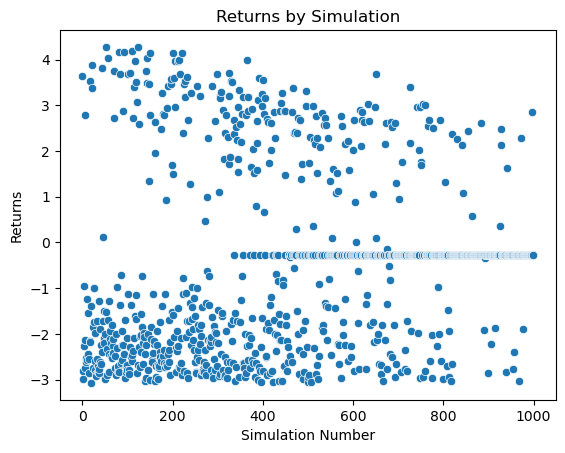

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your DataFrame
x = np.arange(len(data))  # Create sequential numbers for x-axis
y = np.sign(data["returns"]) * np.log1p(np.abs(data["returns"]))

data["signed_log_returns"] = y

sns.scatterplot(data=data, x=x, y="signed_log_returns")
plt.title("Returns by Simulation")
plt.xlabel("Simulation Number")  # Better x-axis label
plt.ylabel("Returns")
plt.show()

In [46]:
data.to_csv("returns_training.csv", index=False)

In [ ]:
"""
The results above correspond to 
- Allowing the agent to trade up to 20 days
- Reward -> return on investment
- Penalty for Net Return = 0 -> -10000
- Penalty for Net Return < 0 -> -10000 + return
"""

In [60]:
data2  = pd.read_csv("simulation_len_tuning.csv")

data2

,average_returns
0,-0.924533
1,-0.011462
2,-0.022388
3,-0.023922
4,-0.014883
...,...
225,0.002342
226,-0.009135
227,-0.006679
228,-0.014123


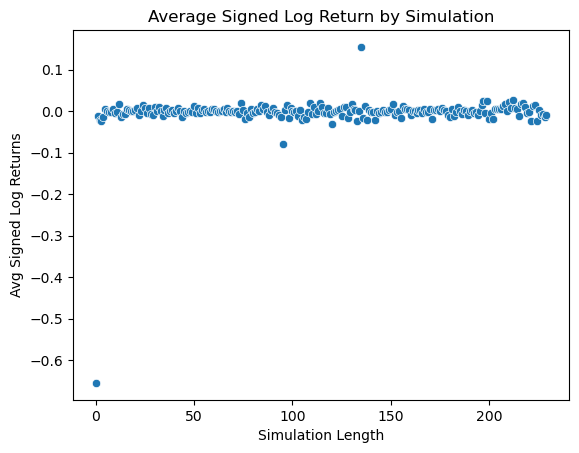

In [62]:
# Assuming 'data' is your DataFrame
x = np.arange(len(data2))  # Create sequential numbers for x-axis
y = np.sign(data2["average_returns"]) * np.log1p(np.abs(data2["average_returns"]))

data2["signed_average_log_returns"] = y

sns.scatterplot(data=data2, x=x, y="signed_average_log_returns")
plt.title("Average Signed Log Return by Simulation")
plt.xlabel("Simulation Length")  # Better x-axis label
plt.ylabel("Avg Signed Log Returns")
plt.show()

In [64]:
data2.to_csv("simulation_len_tuning.csv", index=False)

data2

,average_returns,signed_average_log_returns
0,-0.924533,-0.654683
1,-0.011462,-0.011396
2,-0.022388,-0.022141
3,-0.023922,-0.023640
4,-0.014883,-0.014773
...,...,...
225,0.002342,0.002340
226,-0.009135,-0.009093
227,-0.006679,-0.006656
228,-0.014123,-0.014024


In [ ]:
"""
- Reward -> return on investment
- Penalty for Net Return = 0 -> -100
- Penalty for Net Return < 0 -> -100 + return
- Number of trading days per training simulation - ONE STEP GRID SEARCH range(20:252)


This plot shows the average signed log return of the model when training allowed to trade up to (x) number of trading days

Performance appears to stabalize when the agent is allowed more than 50 trading days.
"""

In [1]:
import pandas as pd
import plotly.graph_objects as go

data = pd.read_csv("Penalty_Param_Tuning.csv")

data

,Zero_Return_Penalty_Param,Return Mean,Neg_Return_Penalty_Param,Return Variance
0,0,2.293610,0,531.083000
1,0,0.031008,1,0.678858
2,0,0.015513,2,0.037151
3,0,0.003175,3,0.012710
4,0,-0.000713,4,0.000152
...,...,...,...,...
10196,100,0.000302,96,0.000029
10197,100,0.000610,97,0.000027
10198,100,0.000620,98,0.000034
10199,100,0.000196,99,0.000036


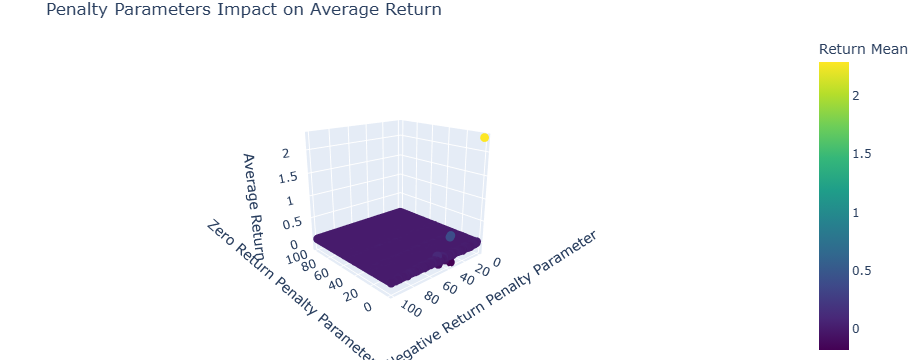

In [15]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure(data=[go.Scatter3d(
    x=data["Zero_Return_Penalty_Param"], 
    y=data["Neg_Return_Penalty_Param"], 
    z=data["Return Mean"],
    mode='markers',
    marker=dict(
        size=5,  # Slightly larger for better visibility
        color=data["Return Mean"],  # Color by return mean
        colorscale='Viridis',
        colorbar=dict(title='Return Mean'),  # Add colorbar title
        showscale=True  # Ensure color scale is visible
    ),
    hovertemplate=(
        "Zero Return Penalty: %{x}<br>"
        "Negative Return Penalty: %{y}<br>"
        "Return Mean: %{z}<extra></extra>"
    )  # Custom hover text
)])

# Update layout
fig.update_layout(
    title='Penalty Parameters Impact on Average Return',
    scene=dict(
        xaxis_title='Zero Return Penalty Parameter',
        yaxis_title='Negative Return Penalty Parameter',
        zaxis_title='Average Return',
        camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))  # Adjust default view angle
    ),
    margin=dict(l=0, r=0, b=0, t=30)  # Adjust margins
)

fig.show()

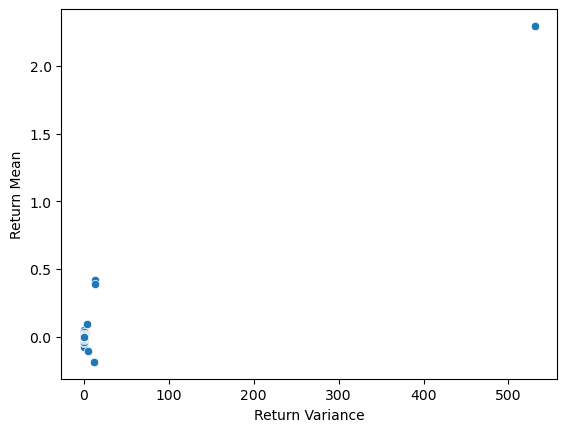

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x="Return Variance", y="Return Mean")
plt.show()

In [29]:
data.sort_values("Return Mean", ascending=False).head(5) #Params that produce the top 5 average returns

,Zero_Return_Penalty_Param,Return Mean,Neg_Return_Penalty_Param,Return Variance
0,0,2.293610,0,531.08300
136,1,0.421970,35,13.54650
137,1,0.393283,36,12.59440
152,1,0.096734,51,4.11577
151,1,0.094543,50,3.99432


In [ ]:
"""
Will be using the following penalty params
Zero_Return : 1
Neg_Return : 36

This decision was made because these params seem to have the best variance return balance

13 input neurons - Layer 1
4 neurons - Hidden Layer 1 + ReLu Activation Function
3 neurons - Output Layer
"""

In [ ]:
"""
10 - Fold Cross Validation

Setting up datasets for batch testing, will be splitting dataset into 10 batches. 
Each iteration will add one batch to the training dataset. The model will be allowed to traded on the next 50 unseen days. 
Model performance will be evaluated based on the results from the unseen data.


Model Architecture / Details

13 input neurons - Layer 1
13 neurons - Hidden Layer 1 + ReLu Activation Function
3 neurons - Output Layer

Zero Return Penalty : 1
Negative Return Penalty : 36
Max Number of Trading Days Allowed 30

""

In [3]:
import pandas as pd
fin_data = pd.read_csv("fin_data.csv")
fin_data

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL,date_index,USA_CPI,log_Close_GC=F,Unemployement_Rate
0,2015-12-01,26.512224,26.844362,26.403772,26.830806,139409600,0.080145,0.266042,-0.001041,0.000216,0,0.632977,6.969603,5.0
1,2015-12-02,26.272720,26.686198,26.227532,26.512220,133546400,0.075837,0.266143,-0.002070,0.000209,1,0.632977,6.960537,5.0
2,2015-12-03,26.028709,26.387961,25.807286,26.333735,166278000,0.055384,0.266068,-0.002303,0.000211,2,0.632977,6.967627,5.0
3,2015-12-04,26.894072,26.943779,26.008373,26.049043,231108000,0.049871,0.266206,-0.002550,0.000214,3,0.632977,6.988874,5.0
4,2015-12-07,26.724617,27.081608,26.618423,26.882779,128336800,0.087501,0.268172,-0.000890,0.000279,4,0.632977,6.981377,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,2024-11-21,227.970078,229.606130,225.166842,228.329212,42108300,0.214190,0.224577,-0.000302,0.000117,2259,2.754135,7.890620,4.2
2257,2024-11-22,229.316818,230.164779,227.511176,227.511176,38168300,0.208561,0.224578,-0.000604,0.000116,2260,2.754135,7.904667,4.2
2258,2024-11-25,232.309601,232.688691,229.187143,230.903006,90152800,0.221514,0.224501,-0.000744,0.000113,2261,2.754135,7.869707,4.2
2259,2024-11-26,234.494324,235.003106,232.768491,232.768491,45986200,0.235557,0.224826,-0.000123,0.000123,2262,2.754135,7.871044,4.2


In [5]:
for i in range(1,10,1):
    length_of_data = fin_data.shape[0]-1
    lower_train = 0
    upper_train = int(length_of_data*(i/10))
    lower_test = upper_train+1
    upper_test = lower_test+30

    train_split = fin_data.iloc[lower_train:upper_train, :]
    test_split = fin_data.iloc[lower_test:upper_test, :]

    train_file_name = f"train_batch_{i}.csv"
    test_file_name = f"test_batch_{i}.csv"
    train_split.to_csv(train_file_name, index=False)
    test_split.to_csv(test_file_name, index=False)

In [7]:
fin_data.describe()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,annual_mu_AAPL,annual_sigma_AAPL,Local_return_mean_AAPL,Local_return_variance_AAPL,date_index,USA_CPI,log_Close_GC=F,Unemployement_Rate
count,2261.000000,2261.000000,2261.000000,2261.000000,2.261000e+03,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000
mean,99.456641,100.431493,98.378104,99.367993,1.081482e+08,0.265727,0.279668,0.000946,0.000329,1132.559487,3.105135,7.375778,4.630473
std,63.738740,64.332049,63.071510,63.680882,5.857023e+07,0.253856,0.075343,0.004026,0.000448,653.467947,2.207004,0.223331,1.806856
min,20.647461,20.951427,20.448621,20.569744,2.404830e+07,-0.307041,0.168161,-0.014494,0.000024,0.000000,0.051281,6.957307,3.400000
25%,40.250801,40.643493,39.828385,40.257203,6.928360e+07,0.082295,0.219842,-0.001503,0.000124,568.000000,1.718275,7.158903,3.700000
50%,79.009773,79.272236,78.324463,78.704378,9.463960e+07,0.259873,0.274550,0.001382,0.000215,1133.000000,2.323291,7.429046,4.000000
75%,154.726700,156.702148,151.971868,154.380809,1.301656e+08,0.409220,0.318667,0.003747,0.000373,1698.000000,3.696589,7.543538,4.800000
max,235.651657,236.658118,233.628769,235.379203,5.334788e+08,1.044048,0.473830,0.015876,0.004846,2263.000000,8.968385,7.933259,14.800000
